# Data Analysis on  Indian Unicorn startups

# Objective
The objective of this project is to analyze the performance and growth trends of Indian Unicorn startups to gain insights into their financial performance, growth trajectories, market presence, and potential factors contributing to their success.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
df = pd.read_csv('C:/Users/137ra/Desktop/Project/Dataset/Indian Unicorn startups 2023 updated.csv')


In [3]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [4]:
df.shape

(102, 8)

There are 102 rows and 8 columns in the dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No.                     102 non-null    int64  
 1   Company                 102 non-null    object 
 2   Sector                  102 non-null    object 
 3   Entry Valuation^^ ($B)  102 non-null    float64
 4   Valuation ($B)          102 non-null    float64
 5   Entry                   102 non-null    object 
 6   Location                102 non-null    object 
 7   Select Investors        102 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ KB


## Data Cleaning

In [6]:
df.columns

Index(['No.', 'Company', 'Sector', 'Entry Valuation^^ ($B)', 'Valuation ($B)',
       'Entry', 'Location', 'Select Investors'],
      dtype='object')

In [7]:
df.drop('No.', axis=1, inplace=True)

Deleting the column 'No.' from the dataframe as it is of no use.

In [8]:
df.rename(columns={'Entry Valuation^^ ($B)':'Entry Valuation ($B)', 'Select Investors':'Investors'}, inplace=True)

Renaming the columns

In [9]:
df['Entry'] = pd.to_datetime(df['Entry'])
df['Entry Month'] = df['Entry'].dt.month
df['Entry Year'] = df['Entry'].dt.year
df.drop('Entry', axis=1, inplace=True)

Changed the data type of 'Entry' column and then made the two different columns 'Entry Month' and 'Entry Year' from the 'Entry' column.

In [10]:
df.head()

,Company,Sector,Entry Valuation ($B),Valuation ($B),Location,Investors,Entry Month,Entry Year
0,InMobi,Adtech - Mobile Ads,1.0,1.0,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",9,2011
1,Flipkart^,E-Commerce,1.0,37.6,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2,2012
2,Mu Sigma,SaaS - Analytics,1.0,1.5,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2,2013
3,Snapdeal*,E-Commerce,1.8,2.4,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",10,2014
4,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2,2015


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               102 non-null    object 
 1   Sector                102 non-null    object 
 2   Entry Valuation ($B)  102 non-null    float64
 3   Valuation ($B)        102 non-null    float64
 4   Location              102 non-null    object 
 5   Investors             102 non-null    object 
 6   Entry Month           102 non-null    int64  
 7   Entry Year            102 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.5+ KB


In [12]:
df.isnull().sum()

Company                 0
Sector                  0
Entry Valuation ($B)    0
Valuation ($B)          0
Location                0
Investors               0
Entry Month             0
Entry Year              0
dtype: int64

There are no null values in the dataset.

In [13]:
df.duplicated().sum()

0

There are no duplicates in the dataset. 

In [14]:
df.describe()

,Entry Valuation ($B),Valuation ($B),Entry Month,Entry Year
count,102.000000,102.000000,102.000000,102.000000
mean,1.547549,3.398020,6.254902,2020.029412
std,1.138013,4.710657,3.533955,2.292717
min,1.000000,0.568000,1.000000,2011.000000
25%,1.000000,1.200000,3.000000,2019.000000
50%,1.200000,1.850000,6.000000,2021.000000
75%,1.582500,3.475000,9.000000,2021.000000
max,10.000000,37.600000,12.000000,2022.000000


## Data Visualisation

### Top Performing Startups on the basis of Valuation

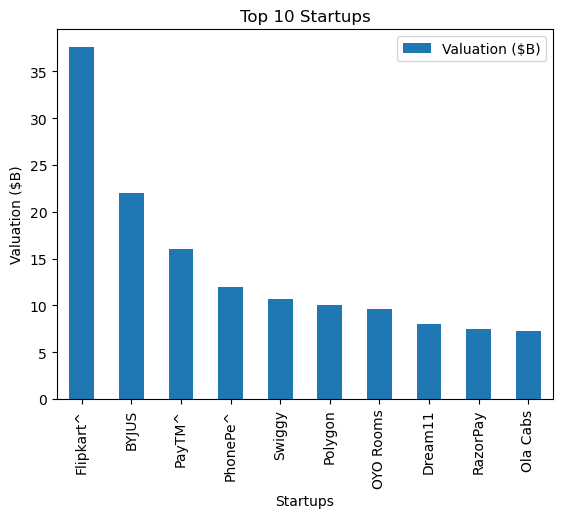

In [15]:
top_companies = df[['Company', 'Valuation ($B)']].sort_values(by="Valuation ($B)", ascending=False,).head(10)
top_companies.plot(kind='bar', x='Company', y='Valuation ($B)')
plt.xlabel('Startups')
plt.ylabel('Valuation ($B)')
plt.title('Top 10 Startups')
plt.show()

###### Flipkart, BYJUS, PayTM, PhonePe and Swiggy are the top 5 startups on the basis of valuation.

### Top Performing Sectors on the basis of Valuation

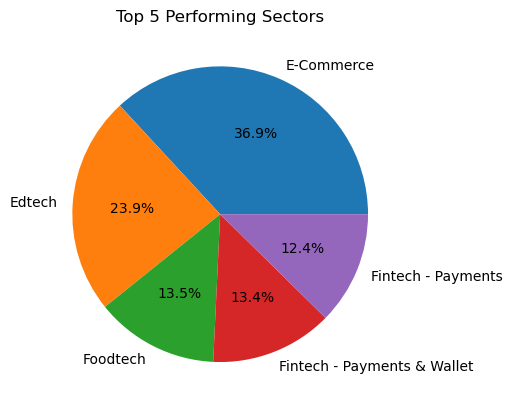

In [16]:
top_valued_sectors = df.groupby('Sector')['Valuation ($B)'].sum().nlargest(5)
top_valued_sectors.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Performing Sectors')
plt.ylabel('')
plt.show()

###### E-Commerce, Edtech, Foodtech and Fintech are the most valued sectors.

### Number of Startups in different Sectors

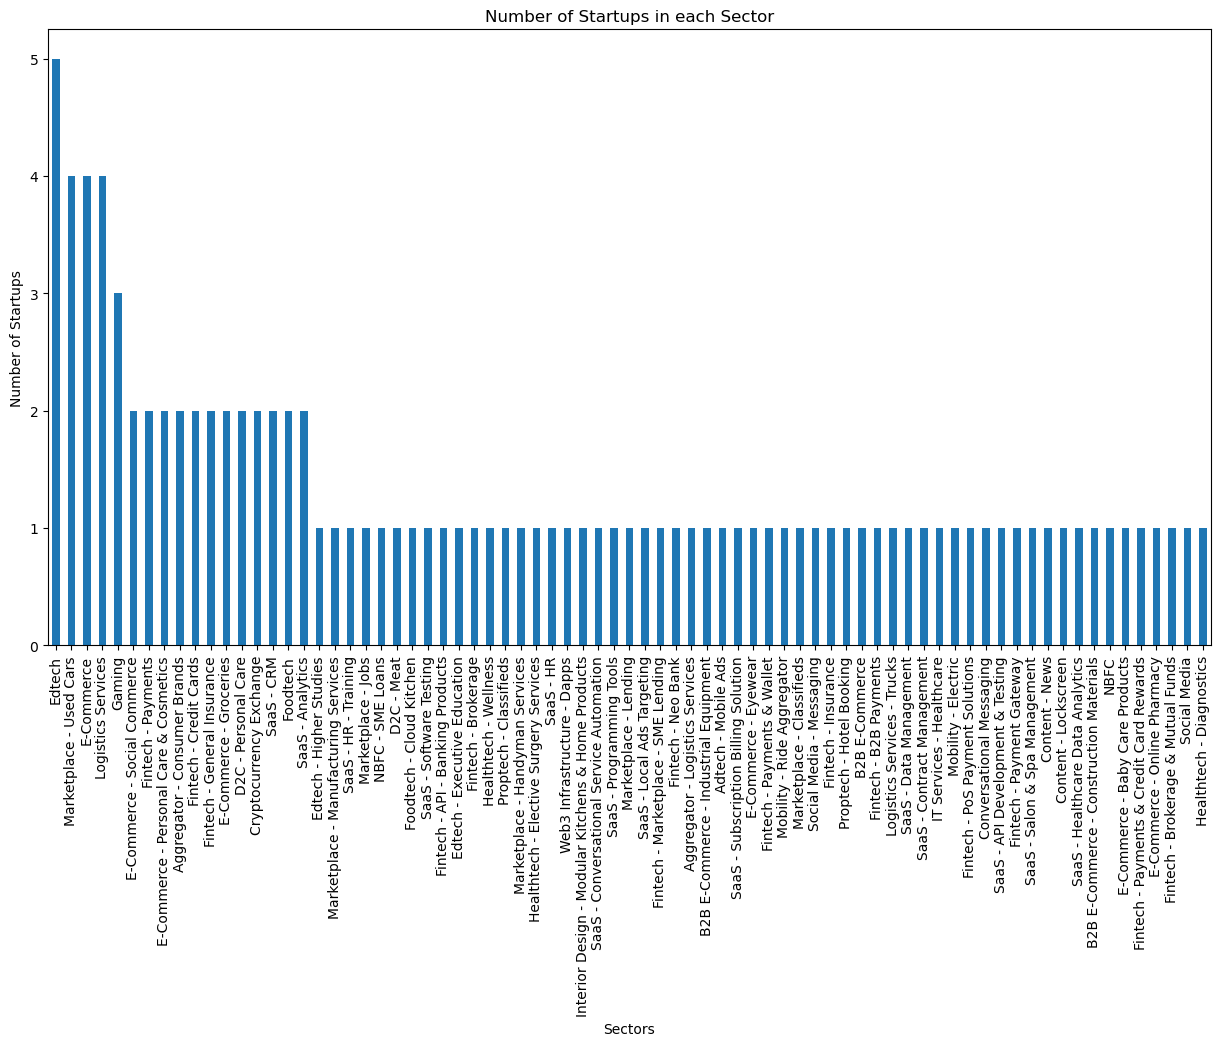

In [17]:
plt.figure(figsize=(15, 8))
df["Sector"].value_counts().plot(kind='bar')
plt.xlabel('Sectors')
plt.ylabel('Number of Startups')
plt.title('Number of Startups in each Sector')
plt.show()

###### Edtech, Used cars marketplace, E-Commerce, Logistics Services and Gaming Sectors have the most number of startups.

### Number of Startups in different Locations

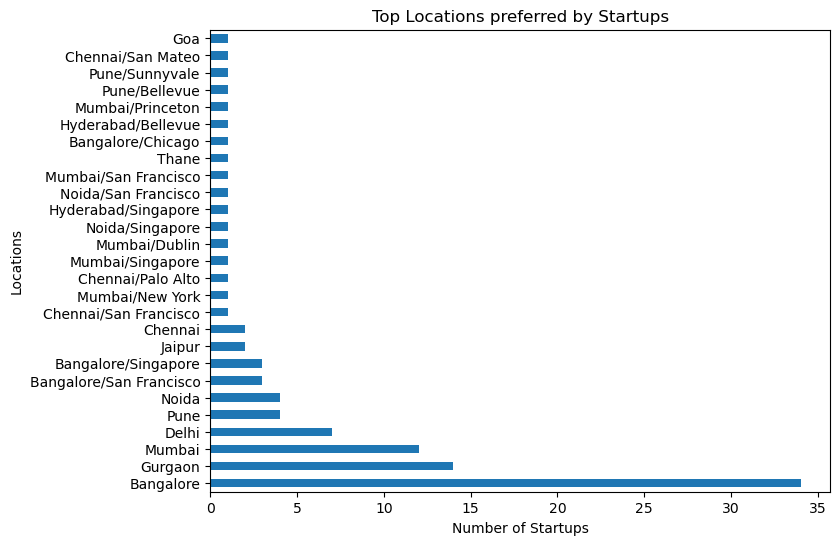

In [18]:
plt.figure(figsize=(8,6))
df["Location"].value_counts().plot(kind='barh', title="Top Locations")
plt.xlabel('Number of Startups')
plt.ylabel('Locations')
plt.title('Top Locations preferred by Startups')
plt.show()

###### Banglore, Gurgaon, Mumbai, Delhi, Pune and Noida are the most preferred locations of the startups.

### Number of Startups became unicorn in different Years

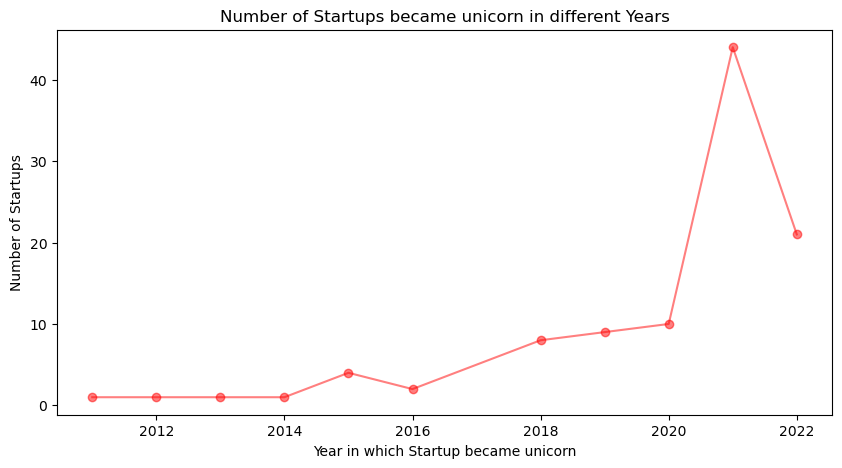

In [19]:
plt.figure(figsize=(10,5))
df['Entry Year'].value_counts().sort_index().plot(kind='line',alpha=0.5,marker='o',color='r')
plt.xlabel('Year in which Startup became unicorn')
plt.ylabel('Number of Startups')
plt.title('Number of Startups became unicorn in different Years')
plt.show()

###### The most number of startups became unicorn in the year 2021.

### Top Investors

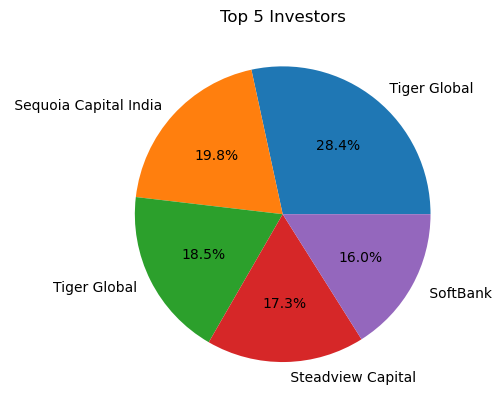

In [20]:
top_investors = df['Investors'].str.split(',', expand=True).stack().value_counts().head(5)
top_investors.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Investors')
plt.show()

###### Tiger Global, Sequoia Capital India, Steadview Capital, SoftBank are the top most investors.

# Conclusion

Flipkart, BYJUS, PayTM, PhonePe and Swiggy are the top Startups which belongs to the E-Commerce, Edtech, Fintech and Foodtech Sectors.

The strong presence of Edtech, E-Commerce, Fintech and Foodtech companies indicates the increasing adoption of technology and digital services, which have witnessed substantial demand and success.

Bangalore, Gurgaon, Mumbai, Delhi, Pune, and Noida are the most preferred locations for Startups.

These cities are known for their thriving startup ecosystems, opportunities to the talent, and supportive infrastructure for new businesses and thats why these cities are known as best cities in India.

Tiger Global, Sequoia Capital India, Steadview Capital, and SoftBank are the topmost investors in the Indian startup ecosystem.

These investors have played a significant role in funding and supporting the growth of startups in various sectors.

And the year 2021 saw the most number of Startups becoming Unicorns that means the growth around year 2020-2021 has been tremendous.